# RGI-07: Region 05 (Greenland Periphery)
##### F. Maussion, S. Galos & F. Roura-Adseiras, November 2021

Goal: same as RGI6

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os
import numpy as np
from utils import mkdir

## Files and storage paths

In [2]:
# Region of interest
reg = 5

# go down from rgi7_scripts/workflow
data_dir = '../../rgi7_data/'

# Level 2 GLIMS files
l2_dir = os.path.join(data_dir, 'l2_sel_reg_tars')

# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_rgi7a'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_rgi7a_tar'))

# RGI v6 file for comparison later 
rgi6_reg_file = os.path.join(data_dir, 'l0_RGIv6', '05_rgi60_GreenlandPeriphery.zip')

### Load the input data

In [3]:
# Read L2 files
shp = gpd.read_file('tar://' + l2_dir + f'/RGI{reg:02d}.tar.gz/RGI{reg:02d}/RGI{reg:02d}.shp')


### List of submissions

In [4]:
toprint = []
for subid in shp.subm_id.unique():
    s_loc = shp.loc[shp.subm_id == subid]
    s = ''
    for c in ['subm_id', 'analysts', 'src_date']:
        toprint = s_loc[c].unique()
        if c != 'src_date':
            s += ' ' + (str(toprint[0]))
        else:
            for d in toprint:
                s += ' ' + d[:4]
    print(s)

 92.0 Jiskoot, Hester 1995
 474.0 Meyer, Joanna 2001
 475.0 Meyer, Joanna 2001
 580.0 Bolch, Tobias; Howat, Ian; LeBris, Raymond; Moelg, Nico; Negrete, A.; Paul, Frank; Rastner, Philipp 2002 2000 2000 2000 2002 2002 2001 2001 2000 1999 1999 2001 2001 1999 2000 2001 2003 2002 2000 2002 2003 2001 2007 2000 2000 2002 2001 1999 2001 2003 2001 1999 2002 2004 2002 1999 2000 2010 2001 2003 2003 2004 1994 2004 2001 2009
 696.0 Paul, Frank; Rastner, Philipp; Schaub, Yvonne 2015 2016 2016
 729.0 Paul, Frank; Rastner, Philipp 1978


## Apply selection criteria to reproduce RGI-6 for this region and check result

### Step 1: extract RGI6 from GLIMS data and do a check

In [5]:
# We use 'subm_id' = 580 as our main dataset
RGI_ss = shp.loc[shp['subm_id'] == 580].copy()

# The subm_id = 729 will be added to subm_id=580 after some actions
RGI_ss_729 = shp.loc[shp['subm_id'] == 729].copy()

`subm_id == 580` is exactly equivalent to the old `shp['geog_area']=='Randolph Glacier Inventory'`

In [6]:
# Write out selection in intermediate shape files for manual GIS review 
# (corresponding to subm_id = 580 (base inventory) and subm_id = 729 (region to be added).)
#tmp_output_dir = mkdir(os.path.join(data_dir, 'l0_tmp_data', 'rgi05_inventories'))
#tmp_output_dir_tar = mkdir(os.path.join(data_dir, 'l0_tmp_data'))

#for subid in [580, 729]:
#    s_loc = shp.loc[shp.subm_id == subid]
#    s_loc.to_file(tmp_output_dir + f'/subm_{int(subid):03d}.shp')
    
#print('Taring...')
#print(subprocess.run(['tar', '-zcvf', f'{tmp_output_dir_tar}/rgi05_inventories.tar.gz', '-C', 
#                      os.path.join(data_dir, 'l0_tmp_data'), 'rgi05_inventories']))

<AxesSubplot:>

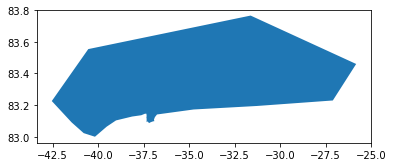

In [7]:
# Read box containing glaciers with subm_id = 729
#filename = 'zip:///' + data_dir + f'/l0_tmp_data/rgi{reg:02d}_north_outline_sel_box.zip/rgi{reg:02d}_north_outline_sel_box.shp'
#print(filename)
#shp = gpd.read_file(filename)

# For some reason I cannot open ".tar" or ".zip". 
# It may have something to do with the fact that I have the data in the windows partition + simbolic link, not in ubuntu pertition.
filename = data_dir + f'/l0_support_data/rgi{reg:02d}_north_outline_sel_box/rgi{reg:02d}_north_outline_sel_box.shp'
box = gpd.read_file(filename)

box.plot()

###### this part is to be finished in order to deal with zipfiles #######
#fnames = []
#with zipfile.ZipFile(levan_file, "r") as z:
#    for f in z.filelist:
#        if '.shp' in f.filename and f.filename.endswith('2000.shp'):
#            print(f.filename)
#gi05_north_outline_sel_box.shp            fnames.append(f.filename)

In [8]:
# create geographical points from existing lon lat
#RGI_ss_729 = gpd.GeoDataFrame(RGI_ss_729, geometry=gpd.points_from_xy(RGI_ss_729.CenLon, RGI_ss_729.CenLat, crs=shp.crs))

#plot points and shapefile
#base = shp.plot(color='white', edgecolor='black')
#RGI_ss_729.geometry.plot(ax=base, marker='o', color='red', markersize=5)

# number of points inside the shapefile, all of them should be inside:
#print('Are all points inside the box? '+ str(all(RGI_ss_729.geometry.within(shp.geometry.iloc[0]) == 1)))

We see that for sumb_id 729 all the points fall inside the box polygon.
Now let's check what points from the `sumb_id=580` are inside the box as well:

In [9]:
#geometry = RGI_ss.geometry
#RGI_ss = gpd.GeoDataFrame(RGI_ss, geometry=gpd.points_from_xy(RGI_ss.CenLon, RGI_ss.CenLat, crs=shp.crs))

#base = shp.plot(color='white', edgecolor='black', figsize=(20, 10))
#RGI_ss.geometry.plot(ax=base, marker='o', color='red', markersize=5)

#print("There are " + str(RGI_ss.geometry.within(shp.geometry.iloc[0]).sum()) + ' glaciers inside the box')

Now we remove the glaciers inside and add the RGI_ss_729 to RGI_ss:

<AxesSubplot:>

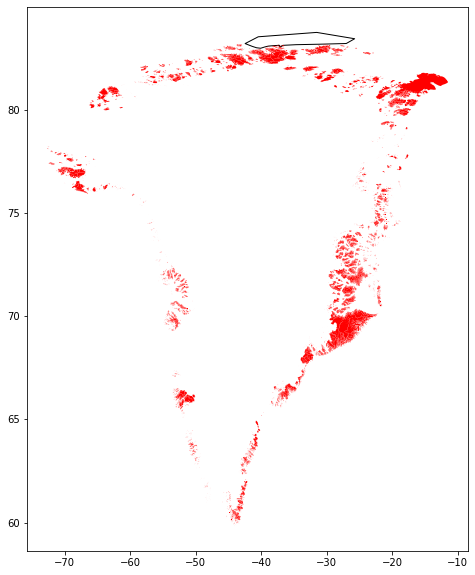

In [10]:
rp = RGI_ss.representative_point()

rp = rp.to_frame('geometry')
rp['orig_index'] = RGI_ss.index

intersect = gpd.overlay(rp, box, how='difference')
intersect

#create temporal var
RGI_ss_dum = RGI_ss.loc[intersect['orig_index']]

base = box.plot(color='white', edgecolor='black', figsize=(20, 10))

RGI_ss_dum.geometry.plot(ax=base, color='red', markersize=5)

<AxesSubplot:>

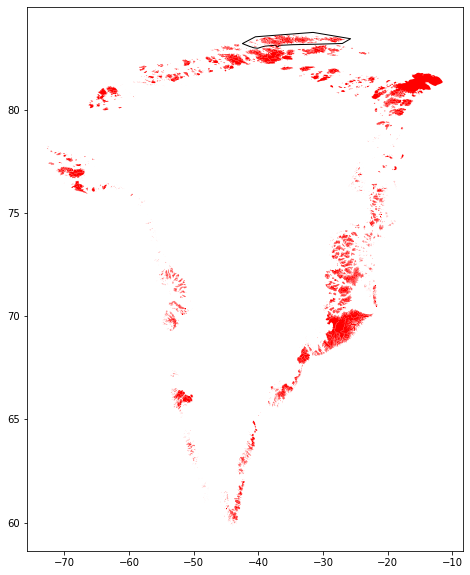

In [11]:
# Merge original RGI 580 without the glacier in the box and the RGI 729
RGI_ss = pd.concat([RGI_ss_dum, RGI_ss_729])
base = box.plot(color='white', edgecolor='black', figsize=(20, 10))
RGI_ss.geometry.plot(ax=base, color='red', markersize=5)

#### load reference data (here RGI6) to enable comparison

In [12]:
# Just to know the name of the file to open from zip
import zipfile
with zipfile.ZipFile(rgi6_reg_file, "r") as z:
    for f in z.filelist:
        if '.shp' in f.filename:
            fname = f.filename

# load reference data
ref_odf = gpd.read_file('zip://' + rgi6_reg_file + '/' + fname)

#### Number of elements (differences do not necessarily depict major problems)

In [13]:
print('Number of glaciers in new RGI subset:', len(RGI_ss))
print('Number of glaciers in reference data:', len(ref_odf))
print('Difference:', len(RGI_ss)-len(ref_odf))

Number of glaciers in new RGI subset: 20843
Number of glaciers in reference data: 20261
Difference: 582


#### check for duplicate glacier IDs

In [14]:
print ('number of glaciers without unique id in RGI06:', len(ref_odf)-len(ref_odf['GLIMSId'].unique()))

number of glaciers without unique id in RGI06: 0


In [15]:
print ('number of glaciers without unique id in RGI06 from GLIMS data base:', len(RGI_ss)-len(RGI_ss['glac_id'].unique()))

number of glaciers without unique id in RGI06 from GLIMS data base: 0


#### Check for 'nominal glaciers' in the RGI6 original data and delete them from new RGI subset from GLIMS if they are in there 

In [16]:
# how many nominals in RGI06 (identifiable via 'Status' attribute in RGI 06)
nom = ref_odf.loc[ref_odf.Status == 2] #--> what are nominal glaciers?
len(nom)

0

In [17]:
# drop nominal glaciers from new RGI subset
RGI_ss = (RGI_ss.loc[~RGI_ss['glac_id'].isin(nom['GLIMSId'])])

#### Total area

In [18]:
# add an area field to RGI_ss and reference data
RGI_ss['area'] = RGI_ss.to_crs({'proj':'cea'}).area
ref_odf['area'] = ref_odf.to_crs({'proj':'cea'}).area
nom['area'] = nom.to_crs({'proj':'cea'}).area

In [19]:
# print and compare area values
Area_Rep = RGI_ss['area'].sum()/1000000
print('Area Rep [km²]:', Area_Rep)
Area_RGI6 = ref_odf['area'].sum()/1000000
print('Area RGI6 [km²]:', Area_RGI6)
Area_nom = nom['area'].sum()/1000000
print('Area Nom [km²]:', Area_nom)
d = (Area_Rep + Area_nom - Area_RGI6)
d_perc = (d/Area_Rep*100)
print('Area difference [km²]:',d,'/','percentage:', d_perc)

Area Rep [km²]: 131286.4703695261
Area RGI6 [km²]: 130071.14640016378
Area Nom [km²]: 0.0
Area difference [km²]: 1215.3239693623182 / percentage: 0.9257038946523589


## result of check (RGI from Glims global data base vs. RGI06 original):
#### difference in number of glaciers: 0
#### dublicate IDs: 0
#### nominal glaciers: 0
#### area difference: 562 km² (!!!) = 0.4%
#### general comment: how comes the area difference?

## Write out and tar 

In [20]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
RGI_ss.to_file(dd + f'RGI{reg:02d}.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))## Write out and tar 

Writing...
Taring...
RGI05/
RGI05/RGI05.cpg
RGI05/RGI05.dbf
RGI05/RGI05.prj
RGI05/RGI05.shp
RGI05/RGI05.shx
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_rgi7a_tar/RGI05.tar.gz', '-C', '../../rgi7_data/l3_rgi7a', 'RGI05'], returncode=0)


## Find missing glaciers 

In [21]:
from utils import haversine
import numpy as np
import progressbar

In [22]:
def xy_coord(geom):
    """To compute CenLon CenLat ourselves"""
    x, y = geom.xy
    return x[0], y[0]

In [23]:
df_ref = ref_odf.copy()
rgi7 = RGI_ss.copy()

In [24]:
# Remove nominal
df_ref = df_ref.loc[df_ref.Status != 2].copy()

In [25]:
# compute CenLon CenLat ourselves
rp = df_ref.representative_point()

coordinates = np.array(list(rp.apply(xy_coord)))
df_ref['CenLon'] = coordinates[:, 0]
df_ref['CenLat'] = coordinates[:, 1]

In [26]:
df_ref_orig = df_ref.copy()

In [27]:
# Loop over all RGI7 glaciers and find their equivalent in ref
df_ref = df_ref_orig.copy()
not_found = {}
to_drop = []
for i, (ref_area, lon, lat) in progressbar.progressbar(enumerate(zip(rgi7['area'].values, rgi7.CenLon.values, rgi7.CenLat.values)), max_value=len(rgi7)):
#     dist = haversine(lon, lat, df_ref.CenLon.values, df_ref.CenLat.values)
    dist = (lon - df_ref.CenLon.values)**2 + (lat - df_ref.CenLat.values)**2 
    found = False
    for j in np.argsort(dist)[:10]:
        s6 = df_ref.iloc[j]
        if np.allclose(s6['area'], ref_area, rtol=0.001):
            found = True
            to_drop.append(s6.name)
            break
    if not found:
        not_found[i] = df_ref.iloc[np.argsort(dist)[:10]]
    if len(to_drop) > 1000:
        df_ref.drop(labels=to_drop, inplace=True)
        to_drop = []
df_ref.drop(labels=to_drop, inplace=True)

100% (20843 of 20843) |##################| Elapsed Time: 0:00:30 Time:  0:00:30


In [28]:
print(len(not_found), len(df_ref))

1607 1025


In [29]:
pb_rgi7 = rgi7.iloc[list(not_found.keys())]

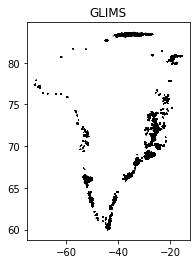

In [30]:
pb_rgi7.plot(edgecolor='k');
plt.title('GLIMS');

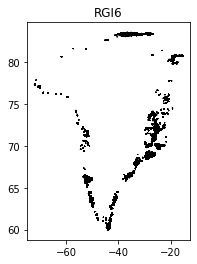

In [31]:
df_ref.plot(edgecolor='k');
plt.title('RGI6');

In [32]:
# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_problem_glaciers'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_problem_glaciers_tar'))

In [33]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
pb_rgi7.to_file(dd + f'RGI{reg:02d}_glims.shp')
df_ref.to_file(dd + f'RGI{reg:02d}_ref.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
RGI05/
RGI05/RGI05_glims.cpg
RGI05/RGI05_glims.dbf
RGI05/RGI05_glims.prj
RGI05/RGI05_glims.shp
RGI05/RGI05_glims.shx
RGI05/RGI05_ref.cpg
RGI05/RGI05_ref.dbf
RGI05/RGI05_ref.prj
RGI05/RGI05_ref.shp
RGI05/RGI05_ref.shx
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_problem_glaciers_tar/RGI05.tar.gz', '-C', '../../rgi7_data/l3_problem_glaciers', 'RGI05'], returncode=0)
